In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'World Largest Cities by Population 2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate
0,0,Tokyo,Japan,37115035,37194105,-0.0021
1,1,Delhi,India,33807403,32941309,0.0263
2,2,Shanghai,China,29867918,29210808,0.0225
3,3,Dhaka,Bangladesh,23935652,23209616,0.0313
4,4,Sao Paulo,Brazil,22806704,22619736,0.0083


In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'World Largest Cities by Population 2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# It seems the dataset is clean (no missing values)

# Optionally, drop any unnecessary columns like 'Unnamed: 0' if it's just an index
df.drop('Unnamed: 0', axis=1, inplace=True)

# Encode categorical variable 'Country' if needed (using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# Splitting the data into features (X) and target (y)
X = df[['Country', 'Population (2023)', 'Growth Rate']]
y = df['Population (2024)']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary, not typically needed for linear regression)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


   Unnamed: 0       City     Country  Population (2024)  Population (2023)  \
0           0      Tokyo       Japan           37115035           37194105   
1           1      Delhi       India           33807403           32941309   
2           2   Shanghai       China           29867918           29210808   
3           3      Dhaka  Bangladesh           23935652           23209616   
4           4  Sao Paulo      Brazil           22806704           22619736   

   Growth Rate  
0      -0.0021  
1       0.0263  
2       0.0225  
3       0.0313  
4       0.0083  
Unnamed: 0           0
City                 0
Country              0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64


Mean Squared Error: 912998084.9143889
R^2 Score: 0.999933581087912


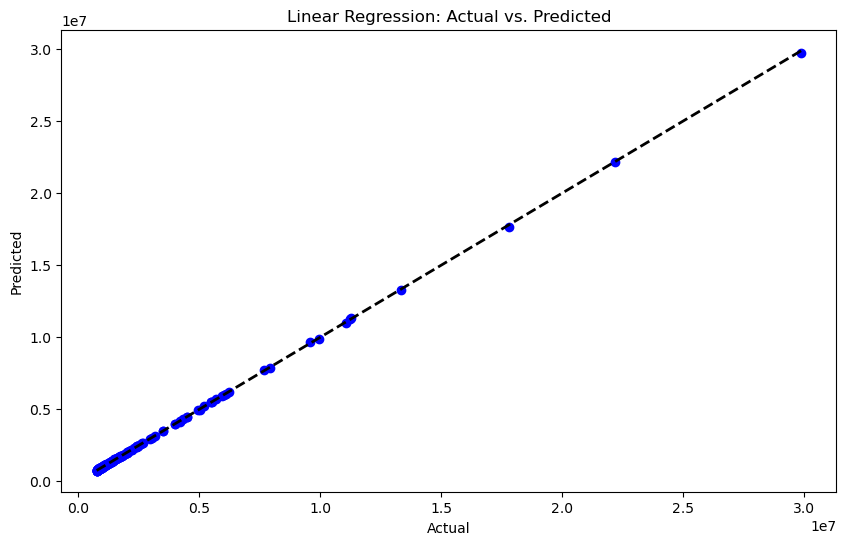

In [2]:
# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()


In [3]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor



In [4]:
# Initialize the models
model_svm = SVR(kernel='linear')
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_nb = GaussianNB()
model_knn = KNeighborsRegressor()



In [5]:






# Train Naive Bayes (for classification purposes, change to appropriate data format)
X_train_nb, X_test_nb = X_train[['Country', 'Population (2023)']], X_test[['Country', 'Population (2023)']]
model_nb.fit(X_train_nb, y_train)
nb_pred = model_nb.predict(X_test_nb)

# Train KNN
model_knn.fit(X_train, y_train)
knn_pred = model_knn.predict(X_test)



In [6]:
# Train SVM
model_svm.fit(X_train, y_train)
svm_pred = model_svm.predict(X_test)

In [7]:
# Train Decision Tree
model_dt.fit(X_train, y_train)
dt_pred = model_dt.predict(X_test)

In [9]:
# Train Random Forest
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)

In [10]:
# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R^2 Score: {r2}')

# Evaluate SVM
evaluate_model(y_test, svm_pred, 'SVM')

# Evaluate Decision Tree
evaluate_model(y_test, dt_pred, 'Decision Tree')

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, 'Random Forest')






SVM - Mean Squared Error: 6981162412601.7
SVM - R^2 Score: 0.49213342260335025
Decision Tree - Mean Squared Error: 112278703647.64597
Decision Tree - R^2 Score: 0.9918319331988136
Random Forest - Mean Squared Error: 9130057828.673834
Random Forest - R^2 Score: 0.9993358052790017


In [11]:
# For Naive Bayes (classification), you would use accuracy_score and possibly confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes - Accuracy: {nb_accuracy}')


Naive Bayes - Accuracy: 0.0


In [12]:
# Evaluate KNN
evaluate_model(y_test, knn_pred, 'KNN')


KNN - Mean Squared Error: 146949077040.87045
KNN - R^2 Score: 0.9893097280370347


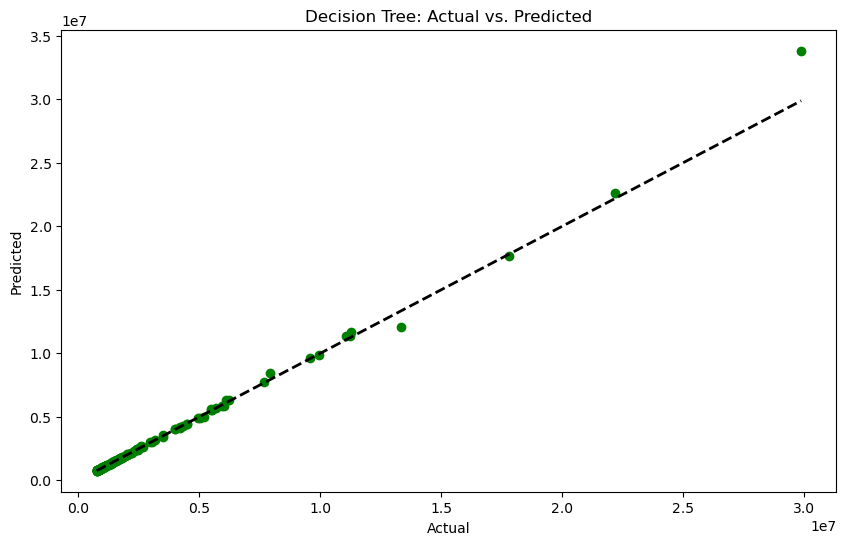

In [13]:
# Visualize results (example for Decision Tree)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs. Predicted')
plt.show()